# Bozza Random forest

# Remember the Dyn dylemma

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

cols = [0, 1, 2, 3, 4, 9, 13, 15, 16, 17, 25, 27]
heade = ['ID', '$M_1$', '$M_2$', '$S_1$', '$S_2$', '$t_{pair}$', '$t_{elapsed}$',
         '$M_{rem}$', '$S_{rem}$', '$v_{escape}$', '$M_{tot}$', 'Gen']
dyn = ''  # Change this to whatever your dyn opinion is



def extractor(path_data, cluster):
    dataset = {}
    wichcluster = os.listdir(path_data)
    if cluster == 'gc': cluster = wichcluster[2]
    if cluster == 'nsc': cluster = wichcluster[1]
    if cluster == 'ysc': cluster = wichcluster[0]
    for i in os.listdir(path_data + cluster + dyn):
        name = path_data + cluster + dyn + '/' + str(i) + '/nth_generation.txt'
        dataset[str(i)] = pd.read_csv(name, delimiter=' ', skiprows=1, usecols=cols, names=heade)
    return dataset

In [2]:
df_gc = extractor('data/','gc')  # globular clusters
df_nsc = extractor('data/','nsc')  # nuclear clusters
df_ysc = extractor('data/','ysc')  # young star clusters

In [3]:
display(df_gc['0.0002'])  # Random dataframe display to check everything's alright

,ID,$M_1$,$M_2$,$S_1$,$S_2$,$t_{pair}$,$t_{elapsed}$,$M_{rem}$,$S_{rem}$,$v_{escape}$,$M_{tot}$,Gen
0,0,88.390495,57.288650,0.745463,0.062135,22.338953,64.614857,136.307923,0.842377,73.761599,9.893655e+05,2
1,4,81.487127,72.545605,0.740324,0.192130,17.532747,118.921837,143.731894,0.831878,86.544363,1.069481e+06,2
2,6,12.689173,9.432273,0.735532,0.127746,214.456801,1729.820838,20.665279,0.837372,125.714369,1.632390e+06,2
3,8,66.679572,60.582243,0.731480,0.208595,10.358315,112.376461,118.754676,0.830889,81.969358,6.854421e+05,2
4,12,104.467554,82.049424,0.723614,0.736716,23.484425,489.215027,171.488739,0.889103,112.477642,2.076314e+06,2
...,...,...,...,...,...,...,...,...,...,...,...,...
266322,735188,1489.598784,1086.099649,0.938757,0.940773,4.304928,626.045869,2313.244208,0.939832,209.810593,8.554346e+06,9
266323,852088,1304.807554,860.551535,0.938819,0.940773,3.188220,719.917249,1949.334796,0.940592,288.741453,1.112344e+07,9
266324,298966,2017.075101,1478.053508,0.943785,0.943785,7.656551,2687.406615,3136.502544,0.940790,274.575792,1.987463e+07,10
266325,298966,3136.502544,166.242832,0.940790,0.940790,4.923903,2692.330518,3255.419104,0.950831,274.575792,1.987463e+07,11


In [4]:
print(df_gc.values())  # Nice LaTeX format will only be displayed if display() as pandas object

dict_values([            ID        $M_1$        $M_2$     $S_1$     $S_2$  $t_{pair}$  \
0            5    69.094208    57.670705  0.711019  0.128699   21.438521   
1            7    38.063741    27.883363  0.734012  0.237416   51.203516   
2           10    24.989444    16.916495  0.725597  0.109035   48.154724   
3           14    14.042051    11.606979  0.732162  0.061596   47.724524   
4           15    16.814667    15.241542  0.717129  0.162880   20.372879   
...        ...          ...          ...       ...       ...         ...   
205690  817939   992.963214   724.864060  0.951674  0.937498    4.337057   
205691  855476  1173.074083  1058.581207  0.937498  0.937498    2.030454   
205692  634378   459.372321   434.439362  0.943225  0.938436    9.087545   
205693  855476  1998.878048  1501.806797  0.938436  0.943225    1.191605   
205694  855476  3141.757997  1803.462389  0.939766  0.939766    0.758134   

        $t_{elapsed}$    $M_{rem}$  $S_{rem}$  $v_{escape}$     $M_{tot}$ 

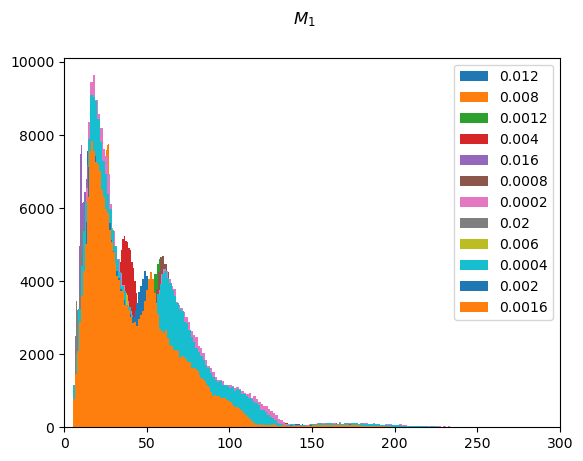

In [5]:
fig, ax = plt.subplots()
for metal, values in df_gc.items(): ax.hist(values['$M_1$'],'auto',label=metal)
ax.legend(loc='upper right')
ax.set_xlim(0,300) # There are some instances with mass way larger than 300, but they are practically invisible in the hist
fig.suptitle('$M_1$')
plt.show()